In [96]:
sra_metadata_filename = "/home/ec2-user/erc-unitigs-poc/Athena_Sept_19_public.acc_mbases.txt"

acc_size = dict()
with open(sra_metadata_filename) as f:
    f.readline()
    for line in f:
        acc, size = line.split()
        size = int(size)
        acc_size[acc] = size
    
print(len(acc_size))

26475979


In [118]:
import boto3
from boto3.dynamodb.conditions import Key, Attr
# Initialize the SimpleDB client
client = boto3.client('sdb')

region='us-east-1'
domain_name = "serratus-batch-unitigs"

query_expression = 'select * from `{}` where `cuttlefish_x64_time` is not null  limit 2000'.format(domain_name)
next_token = None
records = []

while True:
    request_params = {
        'SelectExpression': query_expression,
        'ConsistentRead': True
    }

    # Only add NextToken to the parameters if it's not None
    if next_token:
        request_params['NextToken'] = next_token

    response = client.select(**request_params)

    # Process the response. In this case, just appending to a list, but you might want to process in batches.
    records.extend(response['Items'])

    # If 'NextToken' is in the response, that means there's more data. Otherwise, break.
    next_token = response.get('NextToken')
    if not next_token:
        break

# Print the items from the response
parsed_items = {}
res = []
for item in records:
    item_name = item['Name']
    attributes = {attribute['Name']: attribute['Value'] for attribute in item['Attributes']}
    parsed_items[item_name] = attributes
    cuttlefish_time, cuttlefish_mem, cuttlefisha_time, cuttlefisha_mem, cuttlefisha_pcpu, bcalm_time, bcalm_mem, bcalm_32G_time, bcalm_32G_mem, ggcat_time, ggcat_mem = [None]*11
    if 'cuttlefish_x64_time' in parsed_items[item_name]:
        cuttlefish_time = float(parsed_items[item_name]['cuttlefish_x64_time'])
    if 'cuttlefish_x64_mem' in parsed_items[item_name]:
        cuttlefish_mem = float(parsed_items[item_name]['cuttlefish_x64_mem'])
    if 'cuttlefisha_x64_time' in parsed_items[item_name]:
        cuttlefisha_time = float(parsed_items[item_name]['cuttlefisha_x64_time'])
    if 'cuttlefisha_x64_mem' in parsed_items[item_name]:
        cuttlefisha_mem = float(parsed_items[item_name]['cuttlefisha_x64_mem'])
    if 'cuttlefisha_x64_percent_cpu' in parsed_items[item_name]:
        cuttlefisha_pcpu = float(parsed_items[item_name]['cuttlefisha_x64_percent_cpu'])
    if 'bcalm2_x64_time' in parsed_items[item_name]:
        bcalm_time = float(parsed_items[item_name]['bcalm2_x64_time'])
    if 'bcalm2_x64_mem' in parsed_items[item_name]:
        bcalm_mem = float(parsed_items[item_name]['bcalm2_x64_mem'])
    if 'bcalm2_32G_x64_time' in parsed_items[item_name]:
        bcalm_32G_time = float(parsed_items[item_name]['bcalm2_32G_x64_time'])
    if 'bcalm2_32G_x64_mem' in parsed_items[item_name]:
        bcalm_32G_mem = float(parsed_items[item_name]['bcalm2_32G_x64_mem'])
    if 'ggcat_x64_time' in parsed_items[item_name]:
        ggcat_time = float(parsed_items[item_name]['ggcat_x64_time'])
    if 'ggcat_x64_mem' in parsed_items[item_name]:
        ggcat_mem = float(parsed_items[item_name]['ggcat_x64_mem'])
    if cuttlefish_time is not None and ggcat_time is not None and bcalm_time is not None:
        res += [(item_name, acc_size[item_name], cuttlefish_time, cuttlefish_mem, cuttlefisha_time, cuttlefisha_mem, cuttlefisha_pcpu, bcalm_time, bcalm_mem, bcalm_32G_time, bcalm_32G_mem, ggcat_time, ggcat_mem)]
    if bcalm_time is not None and (cuttlefish_time is None or ggcat_time is None)  and item_name in acc_size:
        print("Bcalm succeeded but not (cuttlefish or ggcat):")
        print(item_name,"size",acc_size[item_name])
        print(f"cuttlefish_time {cuttlefish_time}, cuttlefish_mem {cuttlefish_mem}, bcalm_time {bcalm_time}, bcalm_mem {bcalm_mem}, ggcat_time {ggcat_time}, ggcat_mem {ggcat_mem}")
    if bcalm_time is None and (cuttlefish_time is not None and ggcat_time is not None) and item_name in acc_size:
        print("Bcalm didn't succeed but (cuttlefish and ggcat) did:")
        print(item_name,"size",acc_size[item_name])
        print(f"cuttlefish_time {cuttlefish_time}, cuttlefish_mem {cuttlefish_mem}, bcalm_time {bcalm_time}, bcalm_mem {bcalm_mem}, ggcat_time {ggcat_time}, ggcat_mem {ggcat_mem}")
        

len(res)


Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR22683981 size 14
cuttlefish_time 10.15087103843689, cuttlefish_mem 4753.65625, bcalm_time None, bcalm_mem None, ggcat_time 4.956270694732666, ggcat_mem 639.546875
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR7007791 size 7
cuttlefish_time 10.15989351272583, cuttlefish_mem 4630.703125, bcalm_time None, bcalm_mem None, ggcat_time 9.701942682266235, ggcat_mem 632.921875
Bcalm didn't succeed but (cuttlefish and ggcat) did:
ERR657517 size 99
cuttlefish_time 10.168242931365967, cuttlefish_mem 5127.375, bcalm_time None, bcalm_mem None, ggcat_time 4.452336311340332, ggcat_mem 552.125
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR13067184 size 200
cuttlefish_time 10.251724481582642, cuttlefish_mem 5163.0, bcalm_time None, bcalm_mem None, ggcat_time 3.4669294357299805, ggcat_mem 552.0
Bcalm didn't succeed but (cuttlefish and ggcat) did:
ERR9283622 size 0
cuttlefish_time 10.354443311691284, cuttlefish_mem 4563.671875, bc

cuttlefish_time 167.14102005958557, cuttlefish_mem 11748.6875, bcalm_time None, bcalm_mem None, ggcat_time 114.39950466156006, ggcat_mem 4840.984375
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR14370139 size 7053
cuttlefish_time 169.39475107192993, cuttlefish_mem 11739.640625, bcalm_time None, bcalm_mem None, ggcat_time 200.53949356079102, ggcat_mem 3758.3125
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR4393241 size 5792
cuttlefish_time 169.39616060256958, cuttlefish_mem 11741.78125, bcalm_time None, bcalm_mem None, ggcat_time 123.84283232688904, ggcat_mem 4128.046875
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR15039840 size 8015
cuttlefish_time 169.75799202919006, cuttlefish_mem 11780.296875, bcalm_time None, bcalm_mem None, ggcat_time 183.32412981987, ggcat_mem 3376.140625
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR20679959 size 6639
cuttlefish_time 169.92850255966187, cuttlefish_mem 11766.234375, bcalm_time None, bcalm_mem None, ggcat_t

SRR24954895 size 337
cuttlefish_time 25.15880823135376, cuttlefish_mem 11730.609375, bcalm_time None, bcalm_mem None, ggcat_time 25.868277311325073, ggcat_mem 2346.34375
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR4061805 size 630
cuttlefish_time 25.205573320388794, cuttlefish_mem 11723.625, bcalm_time None, bcalm_mem None, ggcat_time 31.423593997955322, ggcat_mem 2373.734375
Bcalm didn't succeed but (cuttlefish and ggcat) did:
ERR2940299 size 346
cuttlefish_time 25.2090425491333, cuttlefish_mem 11729.96875, bcalm_time None, bcalm_mem None, ggcat_time 19.73588991165161, ggcat_mem 1627.3125
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR5378924 size 575
cuttlefish_time 25.406069040298462, cuttlefish_mem 11732.984375, bcalm_time None, bcalm_mem None, ggcat_time 23.32445740699768, ggcat_mem 2323.3125
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR7894236 size 319
cuttlefish_time 25.43111491203308, cuttlefish_mem 7831.4375, bcalm_time None, bcalm_mem None, ggc

SRR7265509 size 1249
cuttlefish_time 49.35632276535034, cuttlefish_mem 11719.3125, bcalm_time None, bcalm_mem None, ggcat_time 23.181284189224243, ggcat_mem 2392.734375
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR20934348 size 3099
cuttlefish_time 49.39075708389282, cuttlefish_mem 11714.3125, bcalm_time None, bcalm_mem None, ggcat_time 25.4648654460907, ggcat_mem 1962.125
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR21441580 size 565
cuttlefish_time 49.54365634918213, cuttlefish_mem 11736.34375, bcalm_time None, bcalm_mem None, ggcat_time 24.641900062561035, ggcat_mem 2373.71875
Bcalm didn't succeed but (cuttlefish and ggcat) did:
SRR15131105 size 983
cuttlefish_time 49.6767475605011, cuttlefish_mem 11726.0625, bcalm_time None, bcalm_mem None, ggcat_time 37.40936231613159, ggcat_mem 3076.65625
Bcalm didn't succeed but (cuttlefish and ggcat) did:
ERR612186 size 819
cuttlefish_time 49.76097059249878, cuttlefish_mem 11730.859375, bcalm_time None, bcalm_mem None, ggc

4376

In [119]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from math import log

# Convert the list of tuples into a Pandas DataFrame
df = pd.DataFrame(res, columns=['item_name', 'acc_size', 'cuttlefish_time', 'cuttlefish_mem', 'cuttlefisha_time', 'cuttlefisha_mem', 'cuttlefisha_pcpu', 'bcalm_time', 'bcalm_mem',  'bcalm_32G_time', 'bcalm_32G_mem', 'ggcat_time', 'ggcat_mem'])

# Sort the data by acc_size
df = df.sort_values(by='acc_size')

# select just a subsample of the points
#subsample = 5000
#if len(df) > subsample:
#    df = df.sample(subsample).sort_values(by='acc_size')

# Filter based on acc_size threshold
threshold = 2000
df = df[df['acc_size'] > threshold]

#print(df)

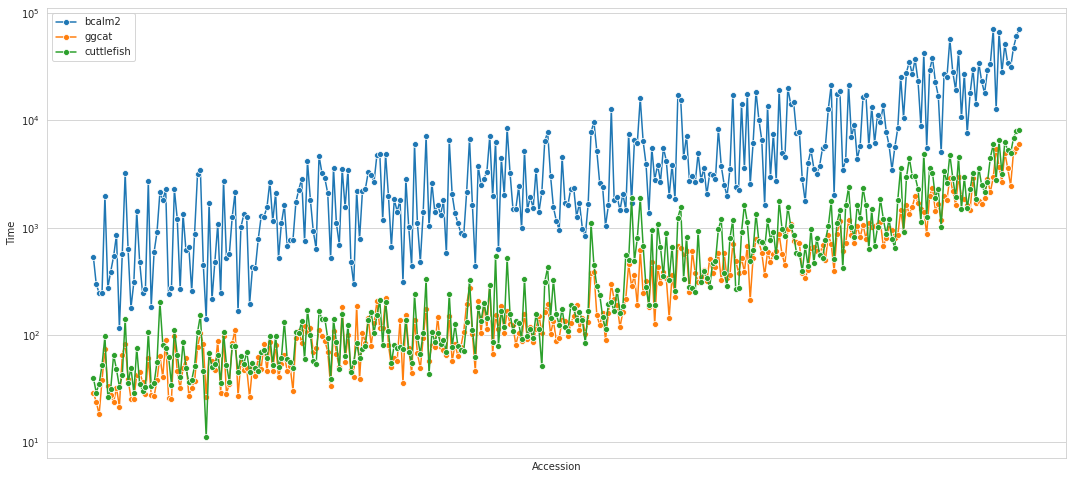

In [121]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(x='item_name', y='bcalm_time', data=df, marker="o", label="bcalm2")
#sns.lineplot(x='item_name', y='bcalm_32G_time', data=df, marker="o", label="bcalm2_32G")
sns.lineplot(x='item_name', y='ggcat_time', data=df, marker="o", label="ggcat")
sns.lineplot(x='item_name', y='cuttlefish_time', data=df, marker="o", label="cuttlefish")
#sns.lineplot(x='item_name', y='cuttlefisha_time', data=df, marker="o", label="cuttlefisha")

sns.set_style("whitegrid")

plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel("Accession")
plt.ylabel("Time")
plt.legend()
plt.tight_layout()
plt.xticks([])  # Hide x-axis labels

fig.set_facecolor("white")
ax.set_facecolor("white")

plt.show()


In [78]:
#acc_size['SRR20706826']
parsed_items['SRR14407446']

{'prefetch_time': '1355',
 'nb_reads': '775105243.5',
 'file_size': '298222842415',
 'fqdump_time': '3240',
 'erc_batch_assembly_dl_time': '9680',
 'erc_batch_assembly_dl_date': '2023-10-06 21:36:07.342390',
 'cuttlefish_x64_mem': '13787.359375',
 'cuttlefish_x64_time': '8137.8289160728455',
 'x64_return_value': '0',
 'bcalm2_x64_mem': '53774.078125',
 'bcalm2_x64_time': '71710.17435121536',
 'ggcat_x64_mem': '12666.546875',
 'ggcat_x64_time': '6078.877882480621'}

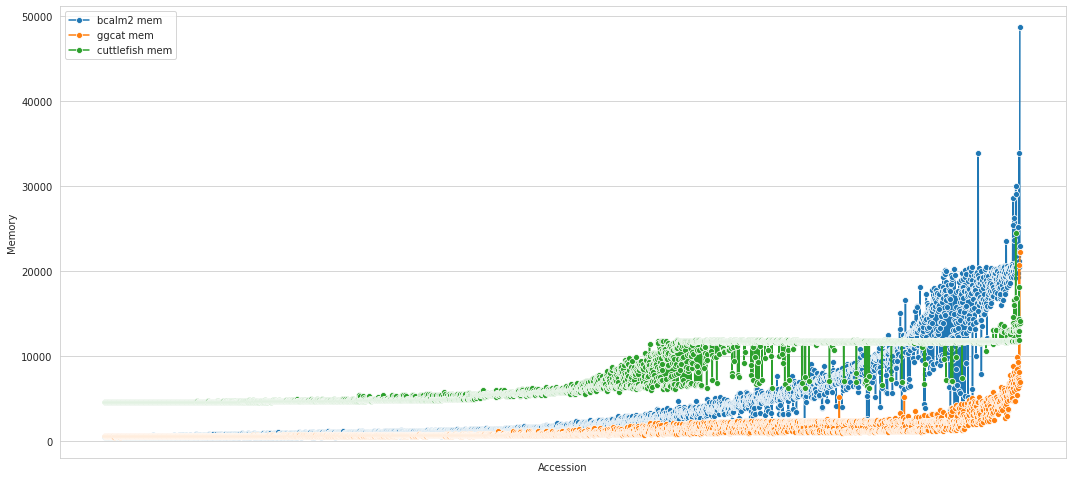

In [35]:
# Same thing with mem
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(x='item_name', y='bcalm_mem', data=df, marker="o", label="bcalm2 mem")
sns.lineplot(x='item_name', y='ggcat_mem', data=df, marker="o", label="ggcat mem")
sns.lineplot(x='item_name', y='cuttlefish_mem', data=df, marker="o", label="cuttlefish mem")

sns.set_style("whitegrid")

#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel("Accession")
plt.ylabel("Memory")
plt.legend()
plt.tight_layout()
plt.xticks([])  # Hide x-axis labels

fig.set_facecolor("white")
ax.set_facecolor("white")

plt.show()


In [115]:
# look at the large acessions 
threshold = 50000
df = pd.DataFrame(res, columns=['item_name', 'acc_size', 'cuttlefish_time', 'cuttlefish_mem', 'cuttlefisha_time', 'cuttlefisha_mem', 'cuttlefisha_pcpu', 'bcalm_time', 'bcalm_mem',  'bcalm_32G_time', 'bcalm_32G_mem', 'ggcat_time', 'ggcat_mem'])
df = df[df['acc_size'] > threshold]
df = df.sort_values(by='acc_size')
# Adjust display settings
pd.set_option('display.max_rows', None)  # or len(df)
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(df)

        item_name  acc_size  cuttlefish_time  cuttlefish_mem  \
3862  SRR2762243   50552     3262.642078      13657.578125     
2951  SRR23384981  51776     1841.720473      11908.968750     
3952  SRR12322232  53264     3619.359459      13101.968750     
3542  SRR9925749   57542     2475.223722      13045.250000     
3307  SRR5343952   63243     2172.881092      12531.468750     
3672  SRR23425462  63573     2660.462153      13015.843750     
4073  SRR7469644   67489     4510.764916      14393.140625     
4208  SRR14416950  73041     5972.225471      24031.140625     
3714  SRR7122040   79382     2792.685778      11919.015625     
4240  SRR14759127  94769     6535.698392      20813.875000     
3836  SRR18511725  98506     3158.416523      12993.890625     
4227  SRR19237871  99653     6312.210280      18118.140625     
4153  ERR3989070   102987    5262.127598      13809.359375     
4122  ERR3242465   104503    4940.686855      13942.468750     
4252  SRR15835870  173795    6836.831540

/home/ec2-user/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.
